In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')
from IPython.display import display
import numpy as np
from itertools import combinations
from collections import Counter
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

C:\Users\KUBUNIUUU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\KUBUNIUUU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Cleaning

### Information about data

In [2]:
pd.set_option('display.max_columns', None) #display all features 
df=pd.read_csv('C:\\Users\\KUBUNIUUU\\Desktop\\pracattakazakase\\data\\fifa20\\players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

### Short decription of variables

In [3]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

#### We can read some statistics:
-average height of the player in FIFA20 is 181,36 cm

-average weight of the player in FIFA20 is 75,27 kg

-average value of the player in FIFA20 is 2,4 mln EUR

In [4]:
print(df.columns.tolist()) # features in data

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

#### Let's check where we have uncompleted data

In [5]:
df.isnull().sum().to_dict()

{'sofifa_id': 0,
 'player_url': 0,
 'short_name': 0,
 'long_name': 0,
 'age': 0,
 'dob': 0,
 'height_cm': 0,
 'weight_kg': 0,
 'nationality': 0,
 'club': 0,
 'overall': 0,
 'potential': 0,
 'value_eur': 0,
 'wage_eur': 0,
 'player_positions': 0,
 'preferred_foot': 0,
 'international_reputation': 0,
 'weak_foot': 0,
 'skill_moves': 0,
 'work_rate': 0,
 'body_type': 0,
 'real_face': 0,
 'release_clause_eur': 1298,
 'player_tags': 16779,
 'team_position': 240,
 'team_jersey_number': 240,
 'loaned_from': 17230,
 'joined': 1288,
 'contract_valid_until': 240,
 'nation_position': 17152,
 'nation_jersey_number': 17152,
 'pace': 2036,
 'shooting': 2036,
 'passing': 2036,
 'dribbling': 2036,
 'defending': 2036,
 'physic': 2036,
 'gk_diving': 16242,
 'gk_handling': 16242,
 'gk_kicking': 16242,
 'gk_reflexes': 16242,
 'gk_speed': 16242,
 'gk_positioning': 16242,
 'player_traits': 10712,
 'attacking_crossing': 0,
 'attacking_finishing': 0,
 'attacking_heading_accuracy': 0,
 'attacking_short_passing

### Now we are going to choose variables which will be the most interesting for us


In [6]:
df.drop(columns=['sofifa_id','player_positions', 'long_name', 'player_url', 'dob', 
                 'real_face', 'player_tags', 'body_type', 'loaned_from', 'joined', 
                 'contract_valid_until', 'nation_position', 'nation_jersey_number',  ], axis=1, inplace = True)
df.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,team_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,RW,10.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,LW,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,CAM,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,164700000.0,GK,13.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,184500000.0,LW,7.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## Short statistics

#### Which countries have the most players in FIFA20?

In [7]:
print('There is', df['nationality'].nunique(), 'nations in FIFA20')
print(df['nationality'].value_counts().head(5))
print('--'*40)
print("European Countries have most players")

There is 162 nations in FIFA20
England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: nationality, dtype: int64
--------------------------------------------------------------------------------
European Countries have most players


#### The best players in different aspects

In [8]:
pr_cols=['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 
         'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed'
        ,'gk_positioning', 'attacking_crossing', 'attacking_finishing',
         'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
         'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
         'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
         'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
         'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
         'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 
         'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
         'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print('BEST IN DIFFERENT ASPECTS :')
for i in pr_cols:
    print(f'{df.loc[df[i].idxmax()][0]}', 'has the greatest value for', f'{i}', '(',f'{df[i].max()}', ')') 
    print('-----------')

BEST IN DIFFERENT ASPECTS :
C. Muñoz has the greatest value for age ( 42 )
-----------
T. Holý has the greatest value for height_cm ( 205 )
-----------
A. Akinfenwa has the greatest value for weight_kg ( 110 )
-----------
L. Messi has the greatest value for overall ( 94 )
-----------
K. Mbappé has the greatest value for potential ( 95 )
-----------
Neymar Jr has the greatest value for value_eur ( 105500000 )
-----------
L. Messi has the greatest value for wage_eur ( 565000 )
-----------
K. Mbappé has the greatest value for pace ( 96.0 )
-----------
Cristiano Ronaldo has the greatest value for shooting ( 93.0 )
-----------
L. Messi has the greatest value for passing ( 92.0 )
-----------
L. Messi has the greatest value for dribbling ( 96.0 )
-----------
V. van Dijk has the greatest value for defending ( 90.0 )
-----------
M. Marega has the greatest value for physic ( 90.0 )
-----------
De Gea has the greatest value for gk_diving ( 90.0 )
-----------
J. Oblak has the greatest value for gk

### Which countries have the most players in FIFA20?

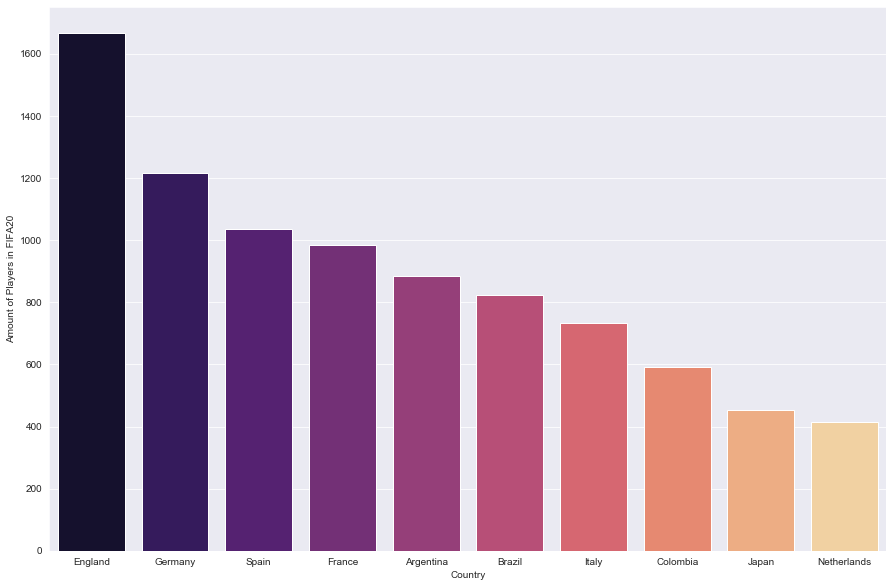

In [9]:
amount=df['nationality'].value_counts().head(5)
Top5countries = df['nationality'].value_counts().rename_axis('Country').reset_index(name='AmountOfPlayers').head(10)
Country = Top5countries['Country']
Amount = Top5countries['AmountOfPlayers']

ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(Country, Amount,  palette="magma")
ax.set(xlabel='Country', ylabel='Amount of Players in FIFA20')
plt.show()

### Which two traits of football players are paired the most commonly?

In [10]:
traits = df['player_traits'].dropna()
traits.head()

0    Beat Offside Trap, Argues with Officials, Earl...
1    Long Throw-in, Selfish, Argues with Officials,...
2    Power Free-Kick, Injury Free, Selfish, Early C...
3                           Flair, Acrobatic Clearance
4    Beat Offside Trap, Selfish, Finesse Shot, Spee...
Name: player_traits, dtype: object

To answer this question we need to split the names of traits in 'player_traits' column.

In [11]:
count = Counter()
for value in traits:
    value = value.split(',')
    count.update(Counter(combinations(value, 2)))
count.most_common(10)

[(('Selfish', ' Crowd Favourite'), 368),
 ((' Selfish', ' Crowd Favourite'), 222),
 ((' Argues with Officials', ' Crowd Favourite'), 208),
 ((' Finesse Shot', ' Crowd Favourite'), 180),
 (('Selfish', ' Argues with Officials'), 138),
 ((' Argues with Officials', ' Finesse Shot'), 132),
 (('Selfish', ' Early Crosser'), 132),
 (('Beat Offside Trap', ' Crowd Favourite'), 128),
 ((' Selfish', ' Argues with Officials'), 124),
 (('Injury Free', ' Selfish'), 123)]

Now we are going to delete spacebars in column of players traits, because words with the spacebar in front, like ' Selfish' are not the same words as 'Selfish', we have to change it. 

In [12]:
count=Counter()
for value in traits:
    a = value.replace(" ", "")
    b = a.split(',')
    count.update(Counter(combinations(b, 2)))
top5=count.most_common(10)
top5

[(('Selfish', 'CrowdFavourite'), 590),
 (('ArgueswithOfficials', 'CrowdFavourite'), 296),
 (('Selfish', 'ArgueswithOfficials'), 262),
 (('FinesseShot', 'CrowdFavourite'), 230),
 (('Selfish', 'EarlyCrosser'), 211),
 (('ArgueswithOfficials', 'FinesseShot'), 191),
 (('Selfish', 'FinesseShot'), 180),
 (('BeatOffsideTrap', 'CrowdFavourite'), 163),
 (('Leadership', 'ArgueswithOfficials'), 154),
 (('ArgueswithOfficials', 'EarlyCrosser'), 148)]

In [13]:
traitspairs=[]
valuespairs=[]
for name in top5:
    traitspairs.append(name[0])
    valuespairs.append(name[1])
traitspairs=pd.Series(traitspairs)

#### Let's print our outcome

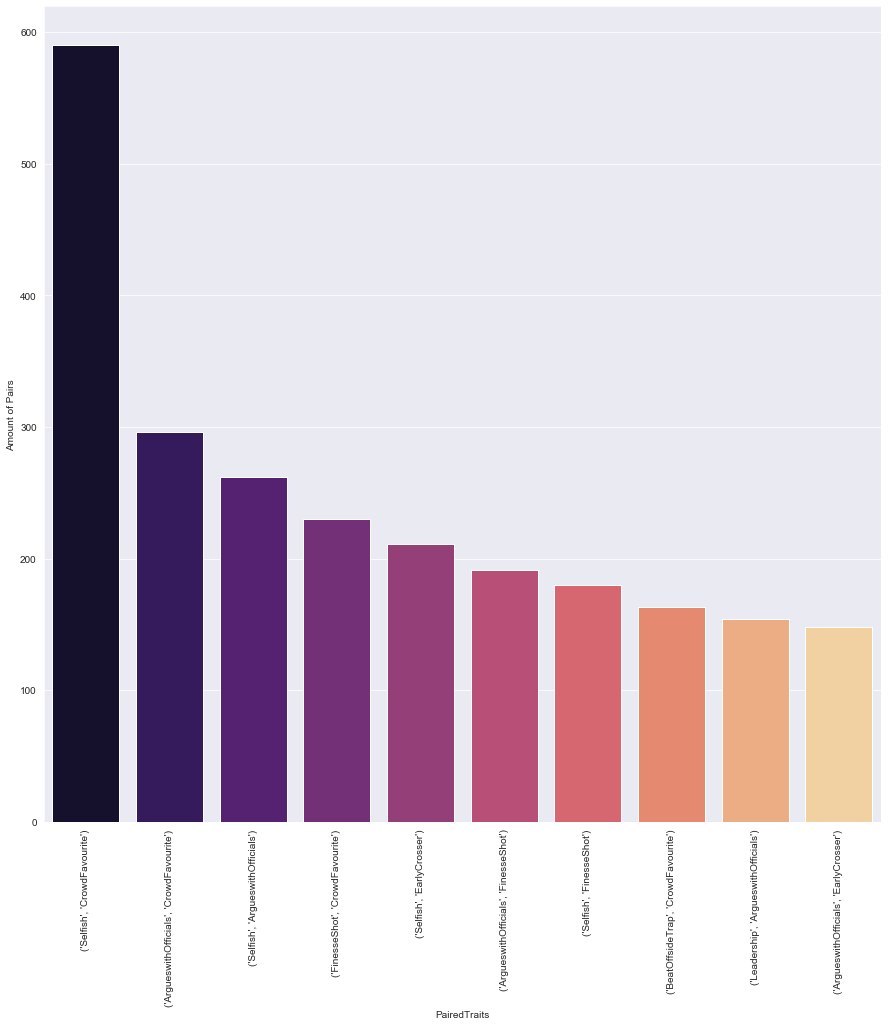

In [14]:
ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(traitspairs, valuespairs,  palette="magma")
ax.set(xlabel='PairedTraits', ylabel='Amount of Pairs')
plt.xticks(rotation=90)
plt.show()

#### The most commonly occured pair is ('Selfish', 'CrowdFavourite')

## Spyder plot

### Spyder plot for every position

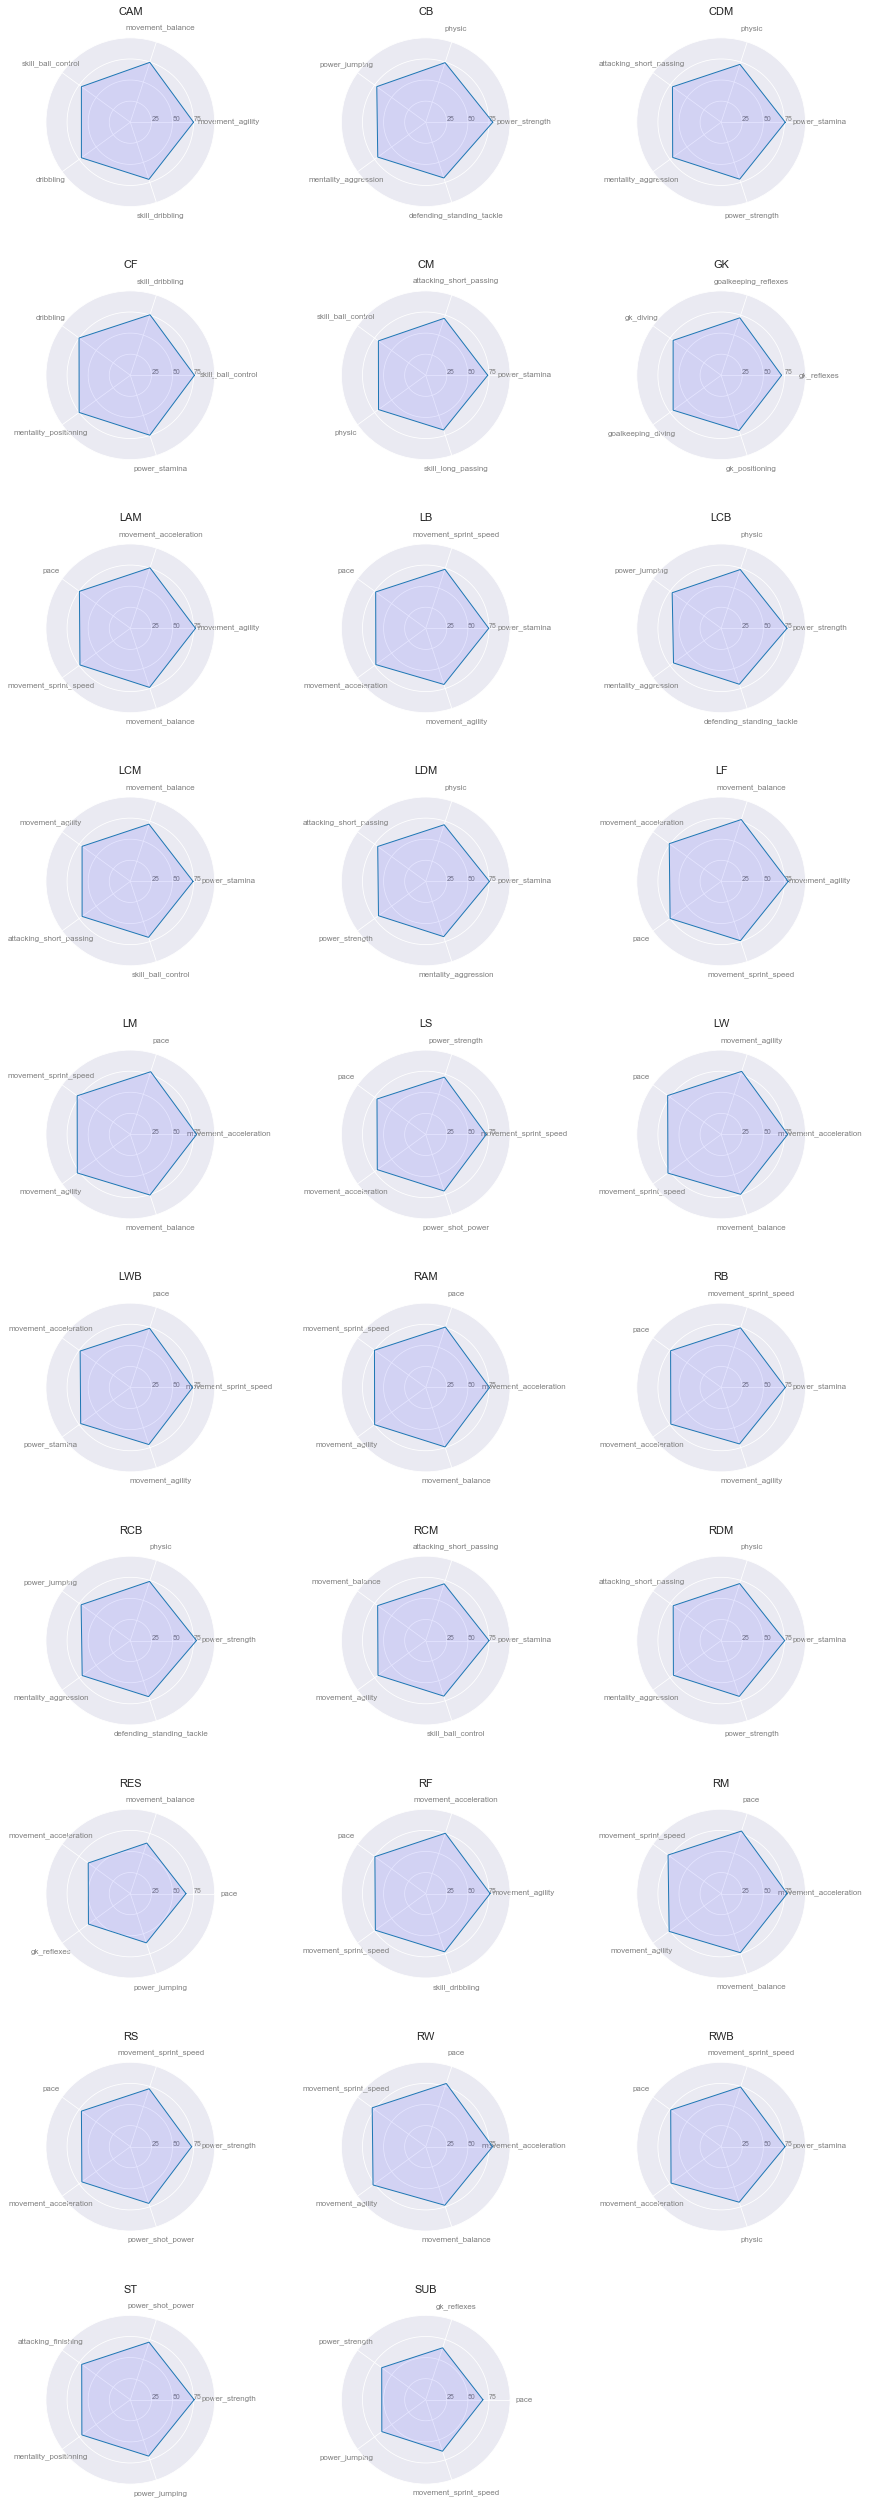

In [15]:
player_features = (
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 
         'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed'
        ,'gk_positioning', 'attacking_crossing', 'attacking_finishing',
         'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
         'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
         'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
         'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
         'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
         'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 
         'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
         'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['team_position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = .5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

#### What's the dependence between age and overall?

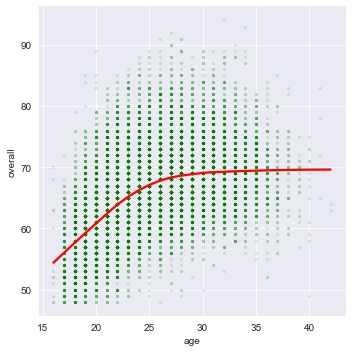

In [16]:
sns.lmplot(data = df, x = 'age', y = 'overall',lowess=True,scatter_kws={'alpha':0.1, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
plt.show()

 Overall is growing with the age of the player till he gets 25 y.o, then overall stabilizes around 70.

#### What is the age range of players in FIFA20?

In [17]:
print('Age range of players from FIFA20:','(',df['age'].min(),',',df['age'].max(), ')')

Age range of players from FIFA20: ( 16 , 42 )


In [18]:
df['age_range']=df['age']
def age_range(age):
    if 16<=age<=20:
        return('[16,20]')
    elif 21<=age<=25:
        return('[21,25]')
    elif 26<=age<=30:
        return('[26,30]')
    elif 31<=age<=35:
        return('[31,35]')
    elif 36<=age<=40:
        return('[36,40]')
    else:
        return('More than 40')

In [19]:
df['age_range']=df['age_range'].apply(lambda x: age_range(x))

In [20]:
Value = df[['short_name', 'value_eur', 'age_range']]
missing_value = Value[Value['value_eur'].isnull() == True].index.tolist()
Value.drop(missing_value, inplace = True)
Value.isnull().sum().to_dict()
Value

,short_name,value_eur,age_range
0,L. Messi,95500000,"[31,35]"
1,Cristiano Ronaldo,58500000,"[31,35]"
2,Neymar Jr,105500000,"[26,30]"
3,J. Oblak,77500000,"[26,30]"
4,E. Hazard,90000000,"[26,30]"
...,...,...,...
18273,Shao Shuai,40000,"[21,25]"
18274,Xiao Mingjie,40000,"[21,25]"
18275,Zhang Wei,40000,"[16,20]"
18276,Wang Haijian,40000,"[16,20]"


#### What's the dependece between age and value of a player?

In [21]:
for age in Value['age_range'].unique():
    mean = round(Value[Value['age_range'] == age]['value_eur'].mean(), 2)
    print('The average value of a player in the age range:' f'{age}' ' is '  f'{mean}'   ' EUR.')

The average value of a player in the age range:[31,35] is 2450425.7 EUR.
The average value of a player in the age range:[26,30] is 3402358.86 EUR.
The average value of a player in the age range:[16,20] is 900981.2 EUR.
The average value of a player in the age range:[21,25] is 2557268.18 EUR.
The average value of a player in the age range:[36,40] is 601132.4 EUR.
The average value of a player in the age range:More than 40 is 495833.33 EUR.


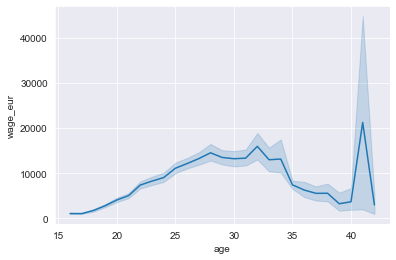

In [22]:
ax = sns.lineplot(x="age", y="wage_eur", data=df)

Wage of the player in FIFA20 is growing up with the age untill he gets 28, then it stabilizes around 14000 EUR untill the age of the player doesn't exceed 34. Between the ages of 34 and 40, the wage drops. We can see that there is interesting increase of wage after 40.

## Correlation between variables in data

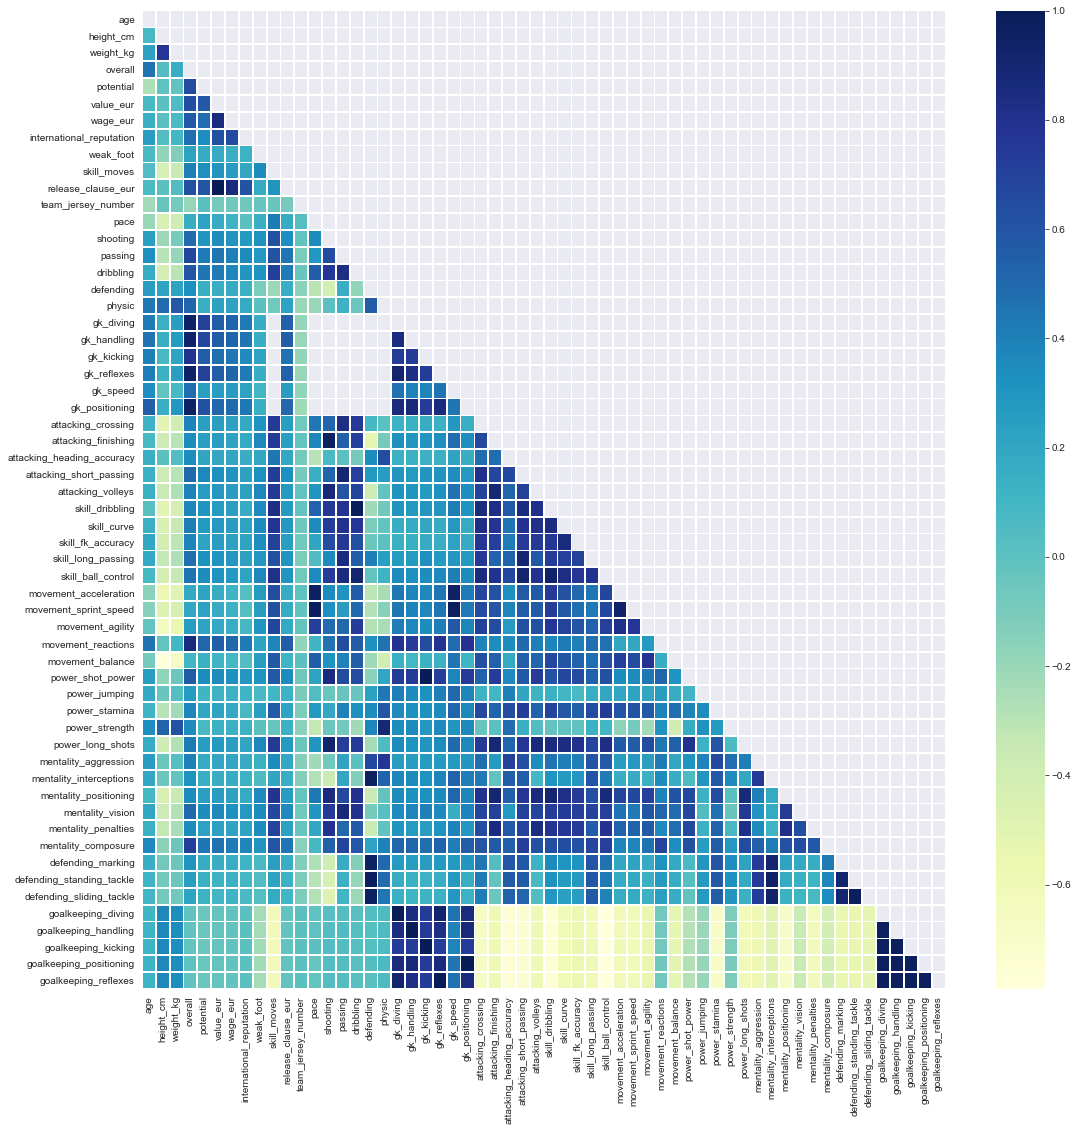

In [23]:
corr = df.corr()
mask = np.zeros_like(corr) #chcemy mieć dane w kształcie trójkąta
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    ax = plt.subplots(figsize=(18, 18)) #zwiększamy obrazki 
    ax = sns.heatmap(corr,mask=mask,square=False,linewidths=.8,cmap="YlGnBu")

### Conclusions:
- high covariance between the variables in which goalkeepers reach high values, like: goalkeeping_diving, goalkeeping_kicking, goalkeeping_reflexes etc.
- high covariance between age and overall
- low covariance between height and variables responsible for long passing, ball control or mentality penalties
- significant covariance between age and gk_positioning

#### Top 50 teams with the highest player's average Value

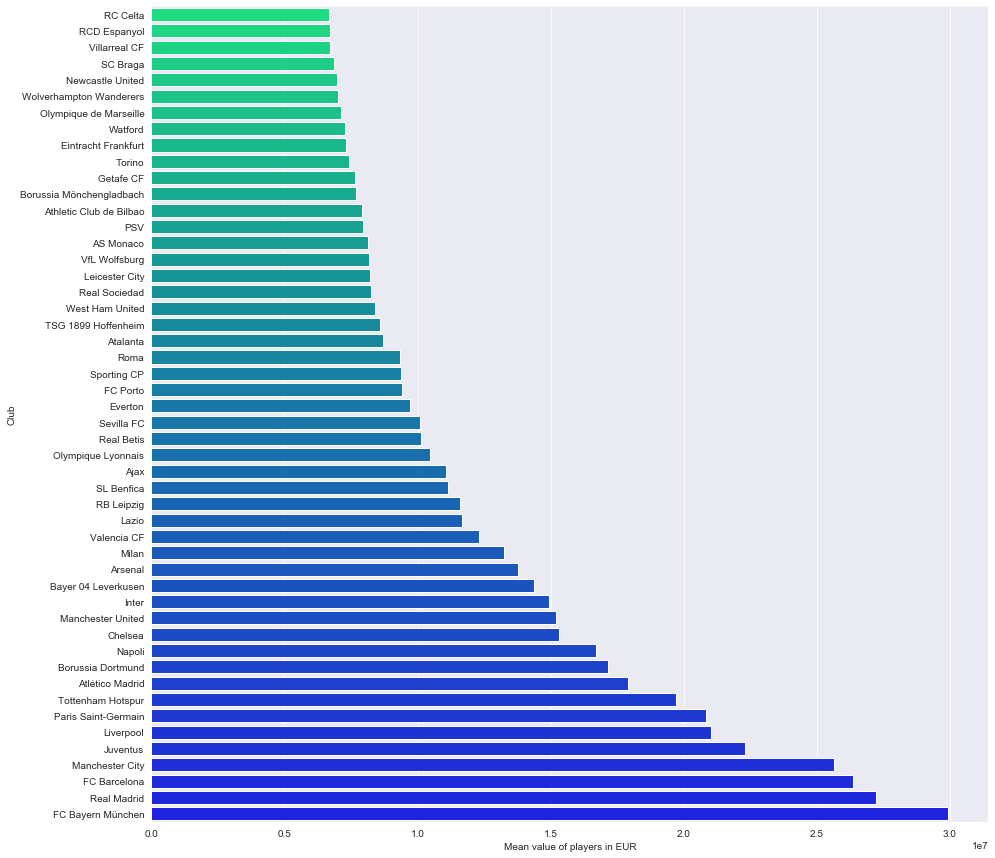

In [24]:
club = df.groupby('club')['value_eur'].mean().reset_index().sort_values('value_eur', ascending=True).tail(50)
plt.subplots(figsize=(15,15))
ax =sns.barplot(data = club, x="value_eur", y="club", palette="winter_r")
ax.set(xlabel='Mean value of players in EUR', ylabel='Club')
plt.show()

##### Top 3 clubs with the biggest mean value of a players: FC Bayern München, Real Madrid, FC Barcelona.

#### Top 50 clubs with the highest player's average wage

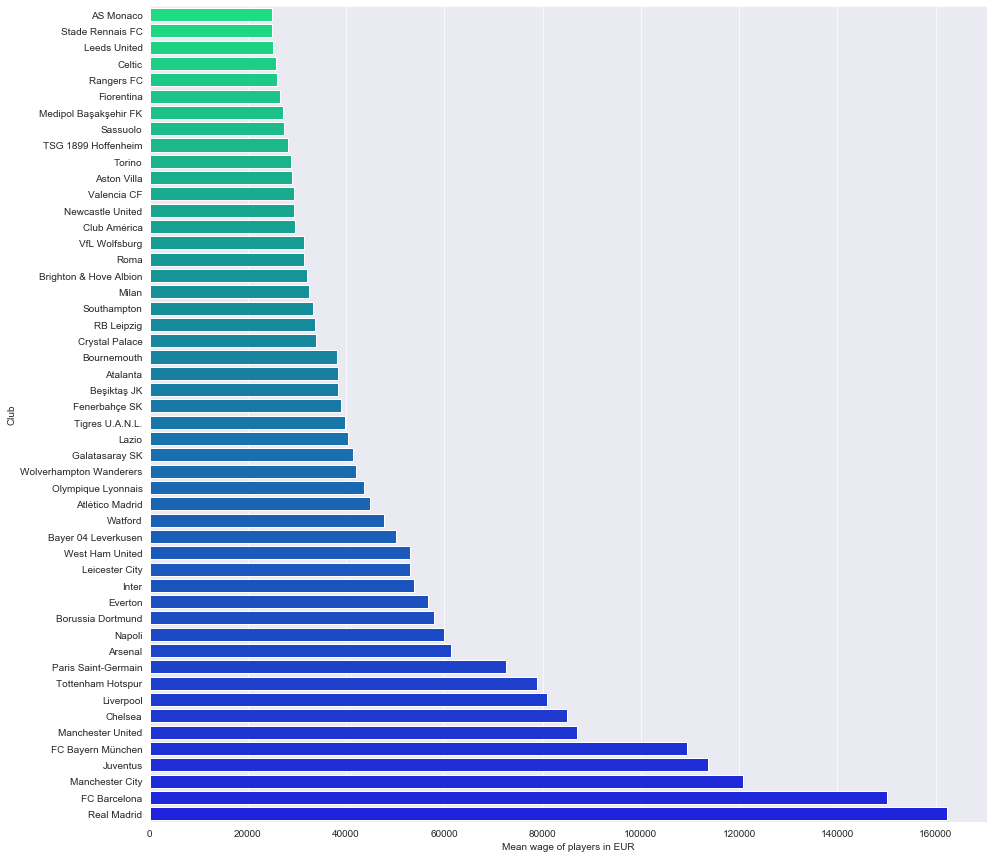

In [25]:
club = df.groupby('club')['wage_eur'].mean().reset_index().sort_values('wage_eur', ascending=True).tail(50)
plt.subplots(figsize=(15,15))
ax =sns.barplot(data = club, x="wage_eur", y="club", palette="winter_r")
ax.set(xlabel='Mean wage of players in EUR', ylabel='Club')
plt.show()

##### Top 3 clubs with the biggest mean value of a players: Real Madrid, FC Barcelona, Manchester City.

#### Top 25 countries with highest player's average overall

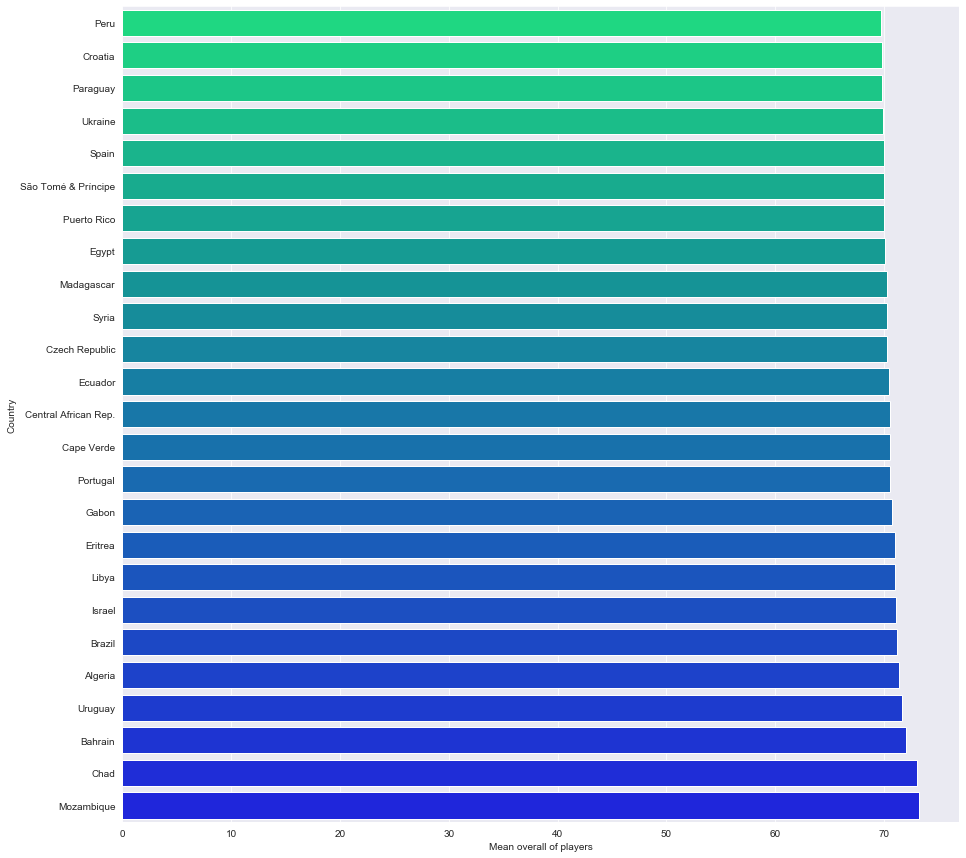

In [26]:
club = df.groupby('nationality')['overall'].mean().reset_index().sort_values('overall', ascending=True).tail(25)
plt.subplots(figsize=(15,15))
ax =sns.barplot(data = club, x="overall", y="nationality", palette="winter_r")
ax.set(xlabel='Mean overall of players', ylabel='Country')
plt.show()

#### Top 25 countries with highest player's average physic

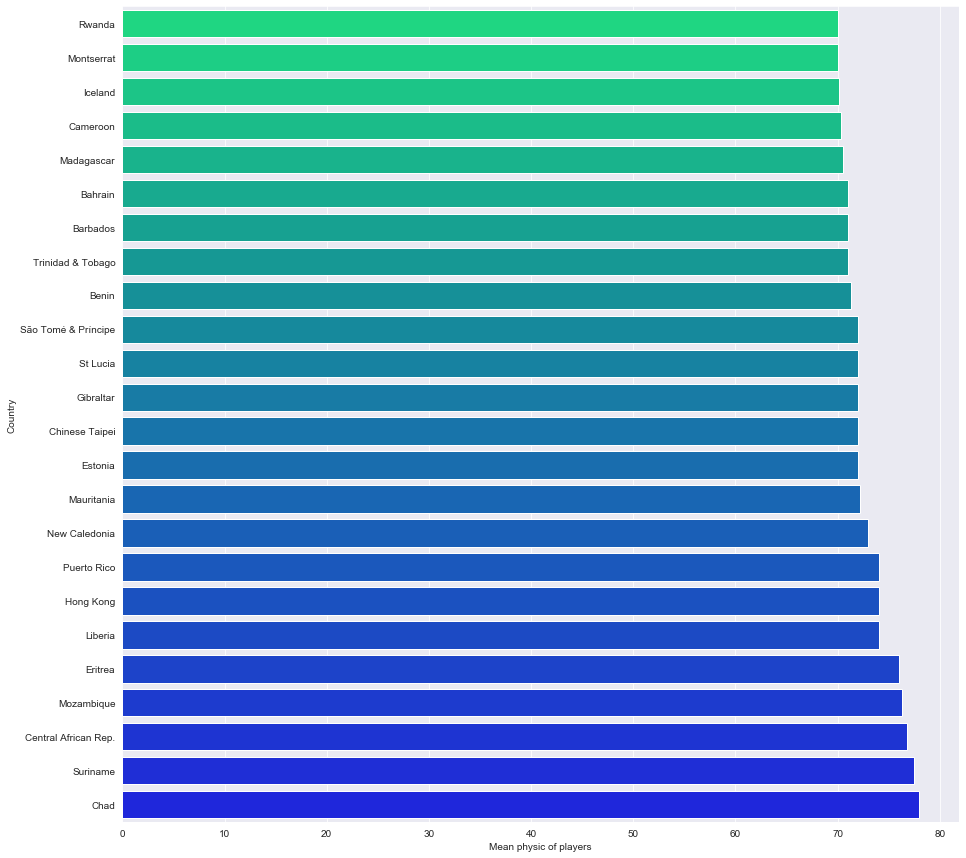

In [27]:
club = df.groupby('nationality')['physic'].mean().reset_index().sort_values('physic', ascending=True).tail(25).dropna()
plt.subplots(figsize=(15,15))
ax =sns.barplot(data = club, x="physic", y="nationality", palette="winter_r")
ax.set(xlabel='Mean physic of players', ylabel='Country')
plt.show()

#### Top 25 countries with the highest player's average pace

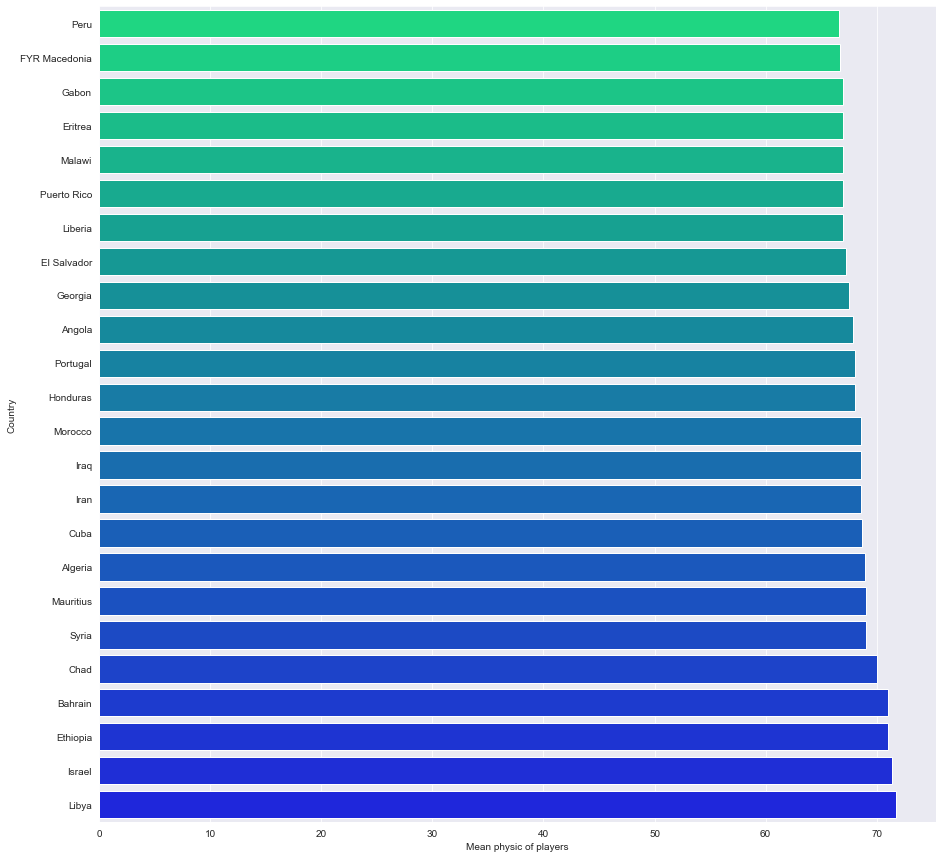

In [28]:
club = df.groupby('nationality')['dribbling'].mean().reset_index().sort_values('dribbling', ascending=True).tail(25).dropna()
plt.subplots(figsize=(15,15))
ax =sns.barplot(data = club, x="dribbling", y="nationality", palette="winter_r")
ax.set(xlabel='Mean physic of players', ylabel='Country')
plt.show()

## Visualization on the pitch

#### Drawing pitch

In [29]:
def draw_pitch(pitch, line, orientation,view):
    
    orientation = orientation
    view = view
    line = line
    pitch = pitch
    
    if view.lower().startswith("h"):
        fig,ax = plt.subplots(figsize=(20.8, 13.6))
        plt.ylim(98, 210)
        plt.xlim(-2, 138)
    else:
        fig,ax = plt.subplots(figsize=(13.6, 20.8))
        plt.ylim(-2, 210)
        plt.xlim(-2, 138)
    ax.axis('off')

    # side and goal lines
    lx1 = [0, 0, 136, 136, 0]
    ly1 = [0, 208, 208, 0, 0]

    plt.plot(lx1,ly1,color=line,zorder=5)

    # boxes, 6 yard box and goals
    # outer boxes
    lx2 = [27.68, 27.68, 108.32, 108.32] 
    ly2 = [208, 175, 175, 208]
    plt.plot(lx2,ly2,color=line,zorder=5)

    lx3 = [27.68, 27.68, 108.32, 108.32] 
    ly3 = [0, 33, 33, 0]
    plt.plot(lx3,ly3,color=line,zorder=5)

    # goals
    lx4 = [60.68, 60.68, 75.32, 75.32]
    ly4 = [208, 208.4, 208.4, 208]
    plt.plot(lx4,ly4,color=line,zorder=5)

    lx5 = [60.68, 60.68, 75.32, 75.32]
    ly5 = [0, -0.4, -0.4, 0]
    plt.plot(lx5,ly5,color=line,zorder=5)

    # 6 yard boxes
    lx6 = [49.68, 49.68, 86.32, 86.32]
    ly6 = [208, 199, 199, 208]
    plt.plot(lx6,ly6,color=line,zorder=5)

    lx7 = [49.68, 49.68, 86.32, 86.32]
    ly7 = [0, 9, 9, 0]
    plt.plot(lx7,ly7,color=line,zorder=5)

    # Halfway line, penalty spots, and kickoff spot
    lx8 = [0, 136] 
    ly8 = [104, 104]
    plt.plot(lx8,ly8,color=line,zorder=5)

    plt.scatter(68, 186, color=line, zorder=5)
    plt.scatter(68, 22, color=line, zorder=5)
    plt.scatter(68, 104, color=line, zorder=5)

    circle1 = plt.Circle((68, 187), 18.30, ls='solid', lw=3, color=line, fill=False, zorder=1, alpha=1)
    circle2 = plt.Circle((68, 21), 18.30, ls='solid', lw=3, color=line, fill=False, zorder=1, alpha=1)
    circle3 = plt.Circle((68, 104), 18.30, ls='solid', lw=3, color=line, fill=False, zorder=2, alpha=1)

    rec1 = plt.Rectangle((40, 175), 60, 33, ls='-', color=pitch, zorder=1, alpha=1)
    rec2 = plt.Rectangle((40, 0), 60, 33, ls='-', color=pitch, zorder=1, alpha=1)
    rec3 = plt.Rectangle((-1, -1), 140, 212, ls='-', color=pitch, zorder=1, alpha=1)

    ax.add_artist(rec3)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(rec1)
    ax.add_artist(rec2)
    ax.add_artist(circle3)   

In [30]:
x=[68, 68, 68, 32, 104, 68, 32, 104, 68, 44, 88, 20, 116, 12, 124, 68, 68, 16, 120, 16, 120, 40, 96, 32, 104, 32, 104]

y = [186, 150, 1, 150, 150, 112, 114, 114, 14, 16, 16, 24, 24, 50, 50, 50, 74, 74, 74, 130, 130, 74, 74, 186, 186, 50, 50]

n = ['ST', 'CF', 'GK', 'LF', 'RF', 'CAM', 'LAM', 'RAM', 'CB', 
    'LCB', 'RCB', 'LB', 'RB', 'LWB', 'RWB', 'CDM', 'CM', 'LM', 
    'RM', 'LW', 'RW', 'LCM', 'RCM', 'LS', 'RS', 'LDM', 'RDM']

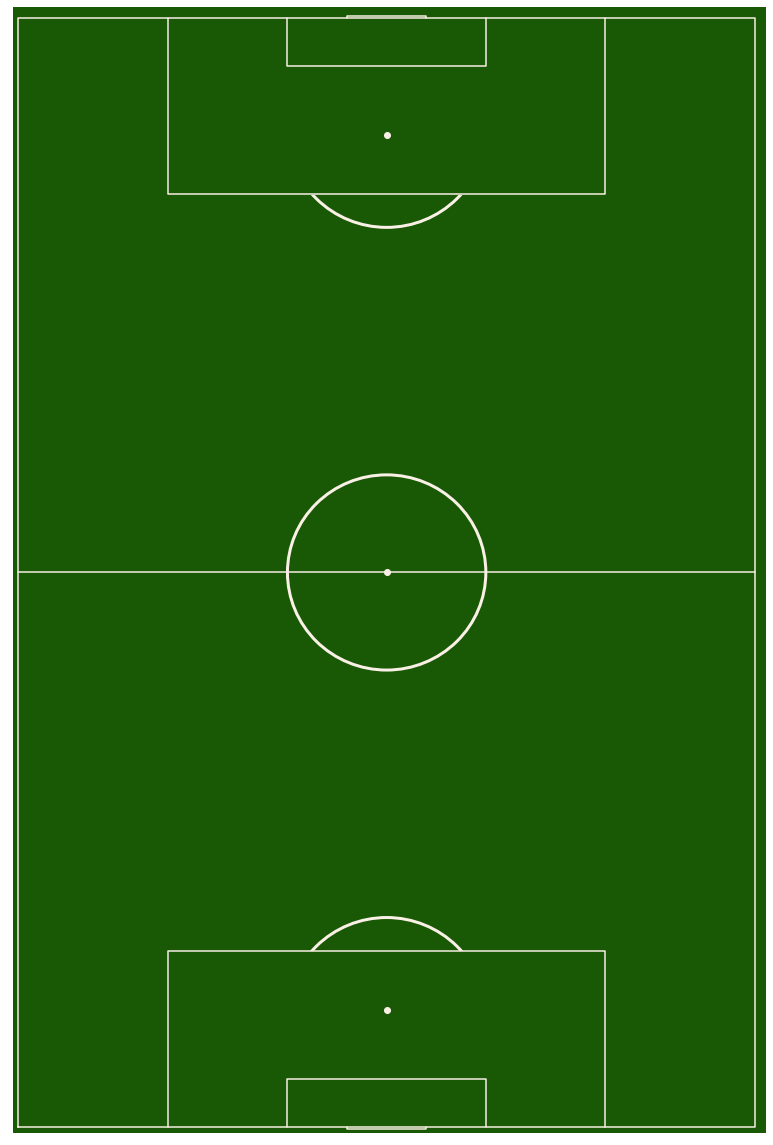

In [31]:
draw_pitch(
    "#195905", 
    "#faf0e6", 
    "v", 
    "full"
)

#### Pitch with positions

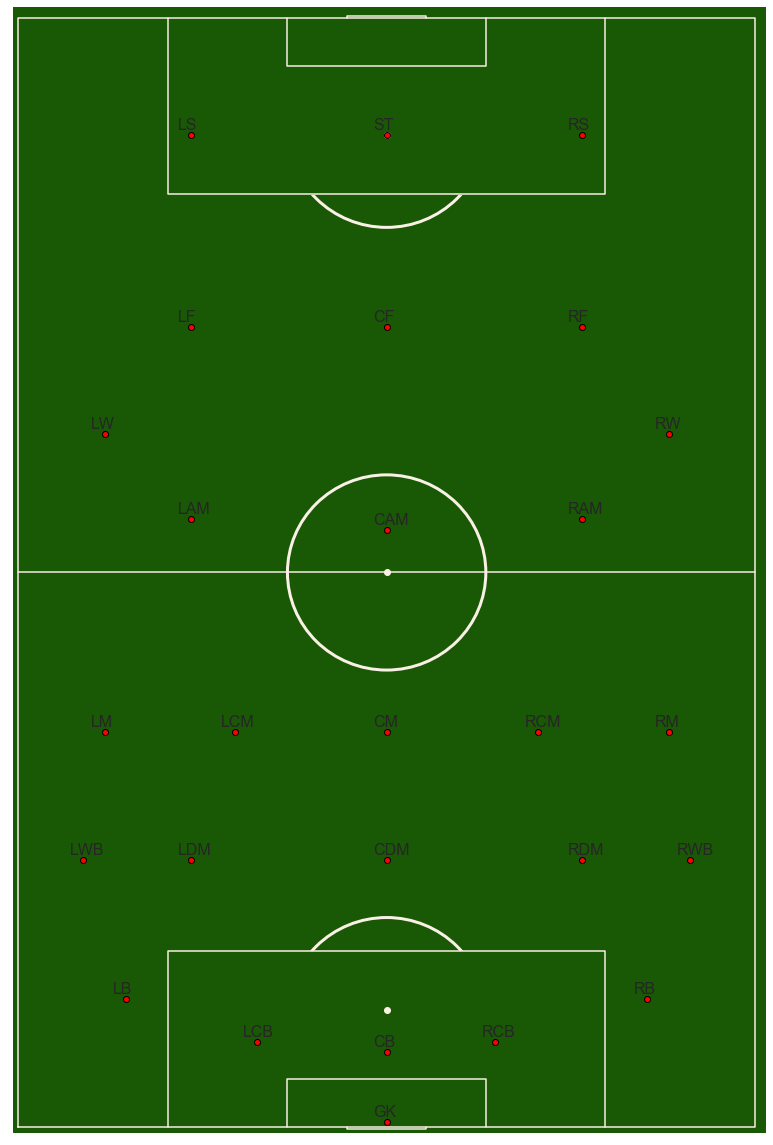

In [32]:
draw_pitch("#195905", "#faf0e6",  "v", "full")

for i, pos in enumerate(n):
    x_c = x[i]
    y_c = y[i]
    plt.scatter(x_c,  y_c, marker='o',  color='red',  edgecolors="black",  zorder=10 )
    plt.text(x_c-2.5, y_c+1, pos, fontsize=16 )

#### Pitch with players who are the best on theirs positions with overall

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


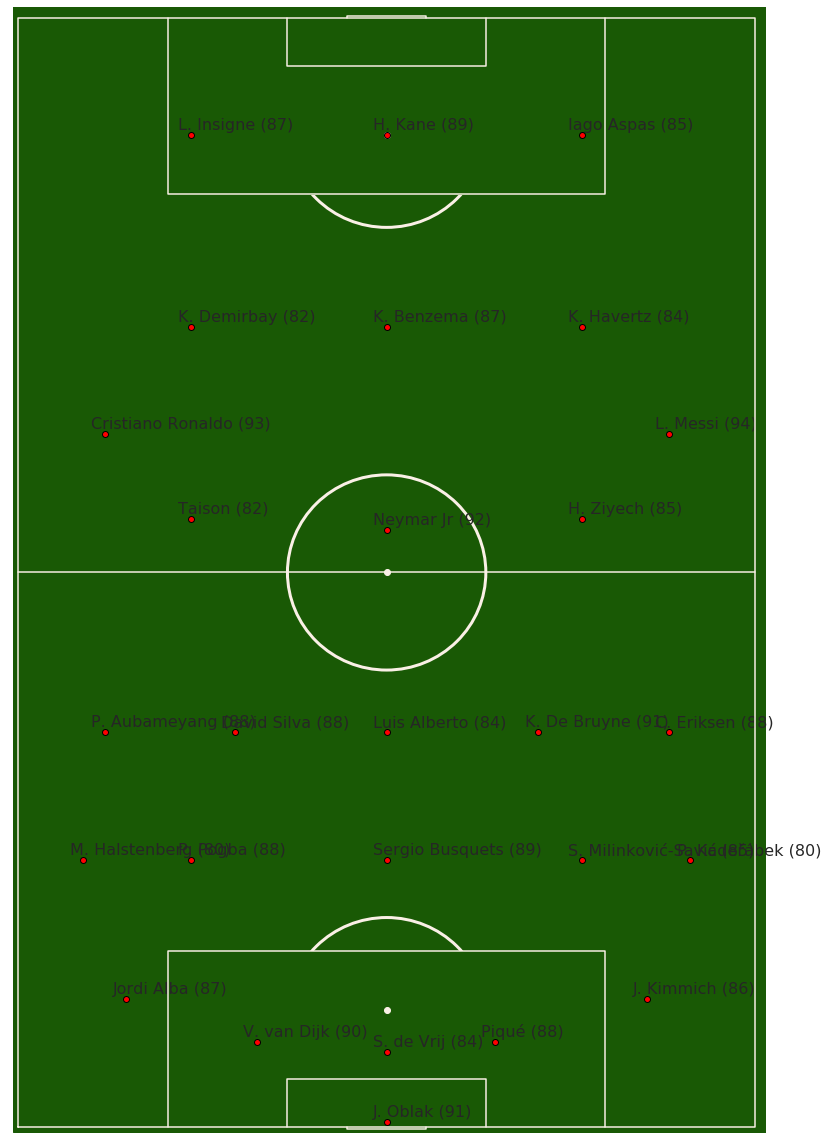

In [33]:
res = list()
for item in n:
    best_df = df[df['team_position']==item]
    best_df = best_df.sort_values(['overall'], ascending=False)
    res.append(best_df.iloc[0]['short_name'] + ' (' + str(best_df.iloc[0]['overall']) + ')')

draw_pitch("#195905", "#faf0e6", "v",  "full")

for i, pos in enumerate(res):
    x_c = x[i]
    y_c = y[i]
    plt.scatter(x_c, y_c, marker='o', color='red', edgecolors="black", zorder=10)
    plt.text(x_c-2.5,  y_c+1, pos, fontsize=16, **hfont)

#### The best team from Poland

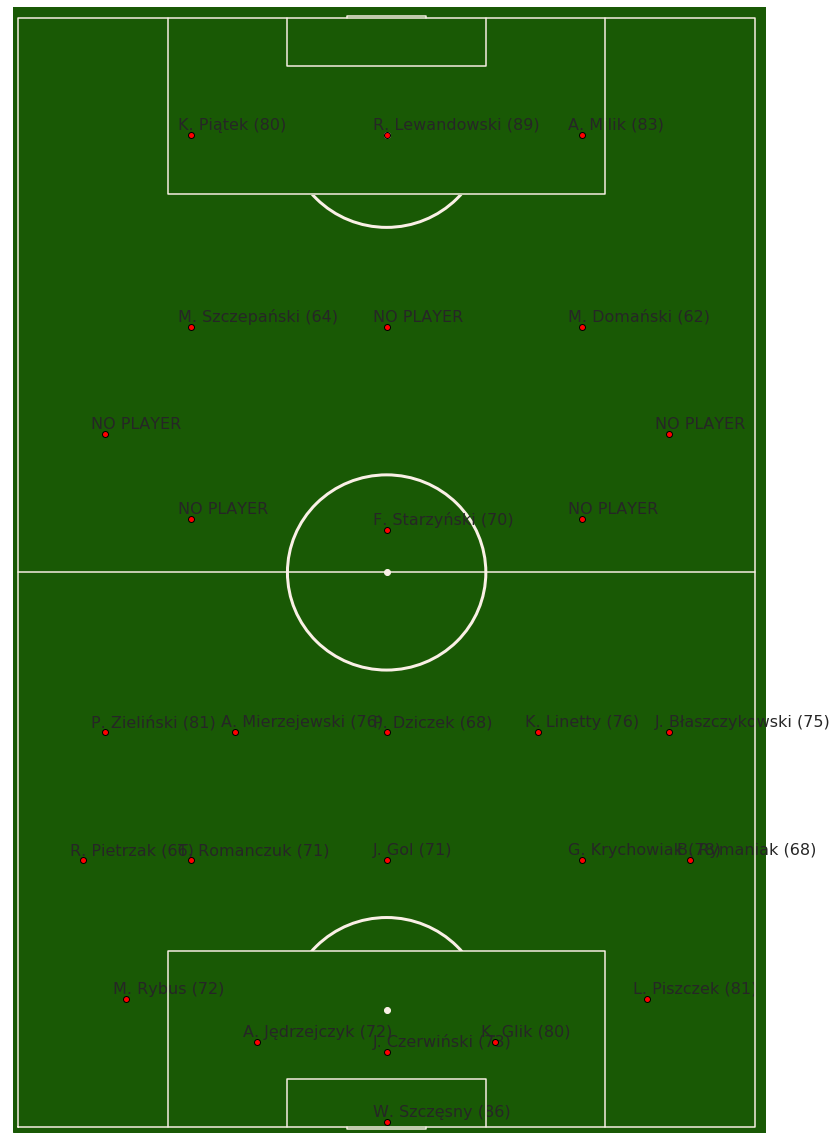

In [34]:
res = list()
for item in n:
    test_df = df[df['nationality']=='Poland']
    test_df = test_df[test_df['team_position']==item]
    test_df = test_df.sort_values(['overall'], ascending=False)
    if len(test_df)>0:
        res.append(test_df.iloc[0]['short_name'] + ' (' + str(test_df.iloc[0]['overall']) + ')')
    else:
        res.append('NO PLAYER')

draw_pitch("#195905", "#faf0e6", "v",  "full")

for i, pos in enumerate(res):
    x_c = x[i]
    y_c = y[i]
    plt.scatter(x_c, y_c, marker='o', color='red', edgecolors="black", zorder=10)
    plt.text(x_c-2.5,  y_c+1, pos, fontsize=16, **hfont)

In [35]:
df.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,team_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,age_range
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,RW,10.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,"[31,35]"
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,LW,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,"[31,35]"
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,CAM,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,"[26,30]"
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,164700000.0,GK,13.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[26,30]"
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,184500000.0,LW,7.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,"[26,30]"


In [36]:
df.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'release_clause_eur', 'team_position', 'team_jersey_number', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_int

## Modelling

#### We are going to use linear regression to predict overall of the players. Let's prepare a data. We are going to focus on the players who are not goalkeepers, because of the missing values in the significant variables.

In [37]:
df=pd.read_csv('C:\\Users\\KUBUNIUUU\\Desktop\\pracattakazakase\\data\\fifa20\\players_20.csv')
df.drop(columns=['short_name','nationality', 'club','sofifa_id','player_positions', 'long_name', 'player_url', 'dob', 'real_face',
                 'player_tags', 'body_type', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 
                 'nation_jersey_number', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'team_jersey_number', 'preferred_foot',
       'rcb', 'rb', 'work_rate', 'player_traits', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'], axis=1, inplace = True)
df = df[df['team_position'] != 'GK']
df = df[df['pace'].isnull()==False]
df = df[df['release_clause_eur'].isnull()==False]
#df.drop(columns = 'team_position', axis=1, inplace = True)
pd.set_option('display.max_columns', None)
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,LW,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22
5,28,181,70,91,91,90000000,370000,4,5,4,166500000.0,RCM,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51


In [38]:
df1 = df.copy() #saving data

#### Target value: overall. Explanatory variables: all columns from 'df1', except overall. 

In [39]:
#Split ID as a Target value
target = df1.overall
df2 = df1.drop(['overall'], axis = 1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)
pd.set_option('display.max_columns', None)
X_train

(3016, 73) (12061, 73)
(3016,) (12061,)


,age,height_cm,weight_kg,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,team_position_CAM,team_position_CB,team_position_CDM,team_position_CF,team_position_CM,team_position_LAM,team_position_LB,team_position_LCB,team_position_LCM,team_position_LDM,team_position_LF,team_position_LM,team_position_LS,team_position_LW,team_position_LWB,team_position_RAM,team_position_RB,team_position_RCB,team_position_RCM,team_position_RDM,team_position_RES,team_position_RF,team_position_RM,team_position_RS,team_position_RW,team_position_RWB,team_position_ST,team_position_SUB
17816,17,184,76,70,100000,1000,1,3,2,198000.0,67.0,48.0,49.0,50.0,24.0,51.0,49,51,33,52,54,48,51,33,45,52,67,67,59,35,58,52,36,52,58,34,34,23,49,48,51,47,22,24,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6457,28,183,70,69,1100000,7000,1,3,3,1400000.0,88.0,63.0,66.0,67.0,42.0,68.0,67,63,55,66,61,67,64,67,64,65,81,94,79,58,61,66,59,66,69,61,68,48,65,66,60,64,41,38,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17779,27,187,83,53,60000,1000,1,3,2,81000.0,50.0,52.0,32.0,45.0,28.0,66.0,24,59,71,35,44,45,34,20,20,41,46,53,54,44,47,48,65,55,80,45,46,19,45,48,54,48,31,19,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14307,21,190,79,69,350000,2000,1,2,2,770000.0,66.0,31.0,30.0,39.0,64.0,64.0,27,27,59,33,33,34,30,27,29,37,61,70,60,54,49,48,68,73,65,20,48,59,30,31,40,48,66,68,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3546,25,178,71,75,3400000,7000,1,3,3,7400000.0,77.0,40.0,60.0,73.0,69.0,67.0,74,31,63,64,35,71,59,29,58,74,78,77,77,72,71,58,76,73,61,36,73,70,62,50,40,68,68,70,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16263,24,177,69,63,170000,2000,1,3,2,225000.0,72.0,56.0,50.0,60.0,38.0,61.0,48,57,41,50,53,60,48,47,52,62,73,71,61,49,66,54,69,62,64,56,48,43,57,51,49,52,32,38,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12376,22,180,71,73,575000,1000,1,2,2,834000.0,68.0,55.0,60.0,64.0,47.0,75.0,59,49,39,63,46,62,54,41,58,63,71,65,72,63,70,67,59,91,68,58,78,62,62,61,48,59,40,50,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4190,25,173,63,76,2800000,11000,1,4,3,4400000.0,87.0,54.0,63.0,74.0,63.0,66.0,70,49,58,63,45,74,80,36,60,71,86,88,83,67,83,65,81,85,55,56,66,68,63,59,50,70,58,64,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10020,22,186,80,76,925000,8000,1,4,3,1900000.0,70.0,58.0,55.0,74.0,36.0,64.0,58,60,68,53,41,76,72,66,50,74,69,71,77,63,63,55,70,65,67,59,53,28,57,54,57,64,28,37,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Fitting the model

In [41]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9408518484887305
RMSE : 1.67820486089666


### Importance of variables

In [42]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2823 ± 0.0072,potential
0.2180 ± 0.0095,age
0.0674 ± 0.0048,value_eur
0.0557 ± 0.0046,movement_reactions
0.0308 ± 0.0018,skill_ball_control
0.0165 ± 0.0025,shooting
0.0155 ± 0.0010,attacking_finishing
0.0138 ± 0.0012,release_clause_eur
0.0126 ± 0.0021,passing
0.0123 ± 0.0013,attacking_short_passing


Conclusion: the biggest impact on overall has potential, age and value, which is in line with our intuition.

### Visualising the results

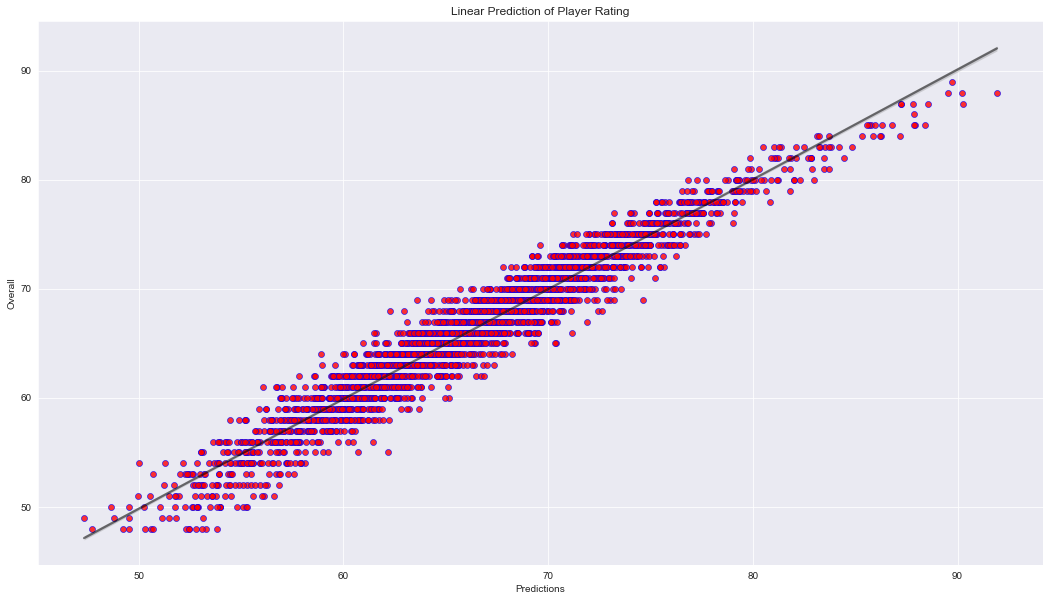

In [43]:
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()